### 多分类例子

In [51]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
# 100张图片，每张100*100*3
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
# 100*10

# x_val = np.random.random((20, 100, 100, 3))
# y_val = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)
# 20*100

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['acc'])

history = model.fit(x_train, y_train, validation_split= 0.2,batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)


Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 7s - loss: 2.3703 - acc: 0.1500 - val_loss: 2.3473 - val_acc: 0.1000
Epoch 2/10
80/80 [==============================] - 7s - loss: 2.3062 - acc: 0.2125 - val_loss: 2.3096 - val_acc: 0.1000
Epoch 3/10
80/80 [==============================] - 7s - loss: 2.2554 - acc: 0.2500 - val_loss: 2.3001 - val_acc: 0.1000
Epoch 4/10
80/80 [==============================] - 7s - loss: 2.2325 - acc: 0.2125 - val_loss: 2.3196 - val_acc: 0.1000
Epoch 5/10
80/80 [==============================] - 7s - loss: 2.2296 - acc: 0.2250 - val_loss: 2.3506 - val_acc: 0.1000
Epoch 6/10
80/80 [==============================] - 7s - loss: 2.2396 - acc: 0.2250 - val_loss: 2.3310 - val_acc: 0.1000
Epoch 7/10
80/80 [==============================] - 7s - loss: 2.2151 - acc: 0.2250 - val_loss: 2.3266 - val_acc: 0.1000
Epoch 8/10
80/80 [==============================] - 7s - loss: 2.2265 - acc: 0.2250 - val_loss: 2.3312 - val_

In [52]:
print(history.history.keys())

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


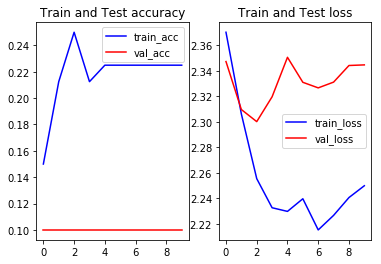

In [56]:
import matplotlib.pyplot as plt
# %matplotlib inline
def plot_training(history):
    plt.figure(12)
    
    plt.subplot(121)
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_acc))
    plt.plot(epochs, train_acc, 'b',label='train_acc')
    plt.plot(epochs, val_acc, 'r',label='val_acc')
    plt.title('Train and Test accuracy')
    plt.legend()
    
    plt.subplot(122)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(train_loss))
    plt.plot(epochs, train_loss, 'b',label='train_loss')
    plt.plot(epochs, val_loss, 'r',label='val_loss')
    plt.title('Train and val loss')
    plt.legend()
 
    plt.show()
plot_training(history)

In [2]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

In [34]:
temp = np.random.random((100,100,3))

# temp = temp[None]

temp = np.expand_dims(temp,axis=0)
print(temp.shape)


(1, 100, 100, 3)


In [23]:
model.predict(temp)

array([[ 0.08062477,  0.08931889,  0.09434231,  0.11652572,  0.10650119,
         0.09704582,  0.12861338,  0.09539164,  0.08517261,  0.10646369]], dtype=float32)

In [20]:
print(np.newaxis)

None
